<a href="https://colab.research.google.com/github/strongway/tutorial_data_science/blob/master/P2_4_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Announcement

Due to the current situation of Covid, the sessions run by Fredrik (next week) will be via online Zoom. 

# Logistic regression


Recall in the session of basic statistics, we have the following diagram:

![](https://cdn.scribbr.com/wp-content/uploads//2020/01/flowchart-for-choosing-a-statistical-test.png)


Logistic regression is for the studies with continuous IVs and binary DV. For examples:

* IV: variable intensity (e.g., loudness, brightness), DV - Binary decision (Yes/No)

* Social binary decisions (Pass / failed; Selected/ not-selected), 
influencial factors: ages, educations, gender...

* Titantic survial rate vs. ticket's class, gender etc. 

In short, the logistic regression model predicts one choice P(Y=1) as a function of inputs X.


__Logistic Regression is also important for computational neuroscience__

Many neural networks implement the logistic function as activation function. Machine learning classification algorithms used it to predict the probability of a categorical dependent variable. 



## Linear regression and Logistic regression

Recall that a linear regression is to find a relation between the dependent variable $y$ and input $X$ in a linear relationship. In mathematical notation, 

$$y = w_0 + w_1 x_1 + ... + w_p x_p$$

where the vector $w = (w_1,..., w_p)$ as ``coef_`` and $w_0$ as ``intercept_``.

The logistic regression further assume the $y$ is a log-likehood ratio between two choices (e.g., Yes vs. No). 

$$\log \frac p {1-p} = y = w'X$$

In a simple case (one IV, one DV), we have 
$$\log  \frac p {1-p} = w_0 + w_1X, $$

which can be transform to 

$$p = \frac {1}{1+ e^{-(w_0+w_1X)}}$$


## Logistic regression



### 1. the shape of logistic function

In [ ]:
# we try statsmodel and pingouin packages today
!pip install pingouin


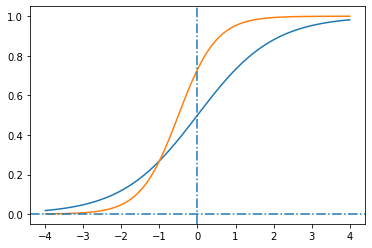

In [21]:
#1. Import relevant packages
import numpy as np  # for matrix and array
import pandas as pd # dealing with matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns # for visualization
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

import pingouin as pg

# Let's take a look of a very simple logistic function
# it looks like a sigmoid curve!

w0 = [0, 1]
w1 = [1, 2]
x = np.linspace(-4,4,100 )
p1 = 1/(1+ np.exp(-w0[0] - w1[0]*x))
p2 = 1/(1+ np.exp(-w0[1] - w1[1]*x))
plt.plot(x,p1)
plt.plot(x,p2)
plt.axhline(linestyle = '-.')
plt.axvline(linestyle = '-.')

__Note__: From the above, we can see that $w_1$ controls the steepness of the logistic function, while $w_0$ controls the horizontal shifts. 

### A toy example
Let's look at a toy logistic model with the hypothetical dataset, adapted from [this tutorial](https://datatofish.com/logistic-regression-python/).

In this example, we want to predict the admission to a prestigous university based on student's GMAT score, GPA, and years of work experience. The data look like below: 

In [12]:

#2. Provide data
# Here are hypothetical data
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
# from dictionary to a data table
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head(10) # show the first 10 rows

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


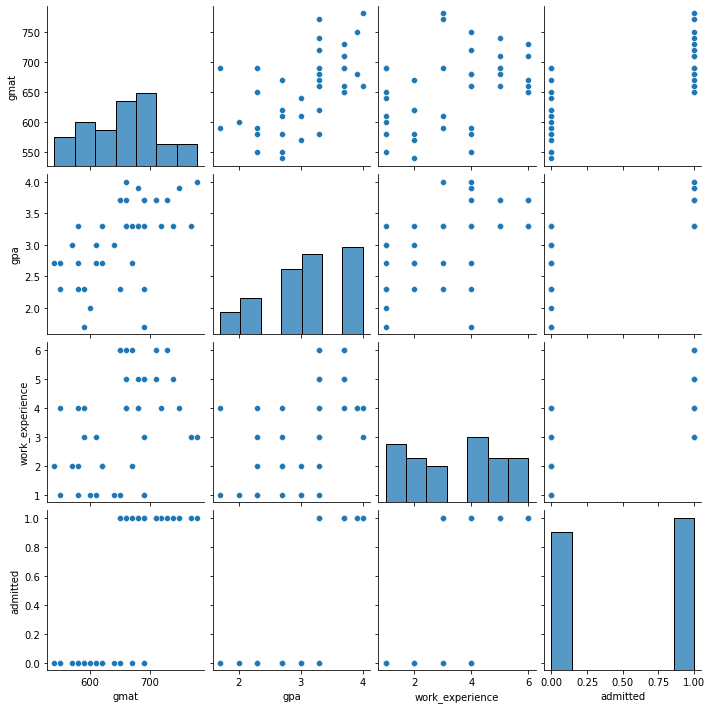

In [13]:
sns.pairplot(data = df)

In [16]:
# Your task: try other visualization method to know your data. 

__Approach 1__: using linear regression

If you want to use linear approach, you may first to transform your data into linear fashion. This approach is simpler when you have averaged data (mean of correct rate or admission rate etc.). 

For binary values [0, 1], there is no log-transformation, so you need to adjust the value first (not recommended). For the comparison and illustration, we adjust the dependent variable. 

In [36]:
df['adjusted'] = df.admitted.replace([0,1],[0.0001,0.9999])
df['ll'] = np.log(df.adjusted/(1-df.adjusted)) # log(p/(1-p))
df.head()

,gmat,gpa,work_experience,admitted,adjusted,ll
0,780,4.0,3,1,0.9999,9.21024
1,750,3.9,4,1,0.9999,9.21024
2,690,3.3,3,1,0.9999,9.21024
3,710,3.7,5,1,0.9999,9.21024
4,680,3.9,4,1,0.9999,9.21024


Now we create a linear model on `ll`. 

In [37]:
# statsmodel approach
model = smf.ols(formula = 'll ~ gmat + gpa + work_experience', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ll   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           4.61e-18
Time:                        13:36:26   Log-Likelihood:                -99.460
No. Observations:                  40   AIC:                             206.9
Df Residuals:                      36   BIC:                             213.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -59.9132      5.396    -11.103      0.000     -70.857     -48.970
gmat                0.0556      0.010      5.725      0.000       0.036       0.075
gpa                 5.1611      1.068      4.833      0.000       2.995       7.327
work_experience     2.3409      0.351      6.671      0.000       1.629       3.053
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   2.350
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.455
Skew:                           0.070   Prob(JB):                        0.796
Kurtosis:                       2.496   Cond. No.                     7.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# Pingouin approach
model2 = pg.linear_regression(df[['gmat','gpa','work_experience']], df['ll'])
model2.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-74.892,6.745,-11.103,0.0,0.9,0.892,-88.572,-61.213
1,gmat,0.070,0.012,5.725,0.0,0.9,0.892,0.045,0.094
2,gpa,6.451,1.335,4.833,0.0,0.9,0.892,3.744,9.159
3,work_experience,2.926,0.439,6.671,0.0,0.9,0.892,2.036,3.816


__Approach 2__ Logistic regression (better approach)

* Statsmodel: `smf.logit(formula = , data = )`. 
* Pingouin: `pg.logistic_regression(X, y)`

In [16]:
df.head()

,gmat,gpa,work_experience,admitted,adjusted,ll
0,780,4.0,3,1,0.99,4.59512
1,750,3.9,4,1,0.99,4.59512
2,690,3.3,3,1,0.99,4.59512
3,710,3.7,5,1,0.99,4.59512
4,680,3.9,4,1,0.99,4.59512


In [31]:
# statsmodel approach
model3 =smf.logit(formula = 'admitted ~ gmat + gpa + work_experience', data = df).fit(method = 'bfgs')
model3.summary()

         Current function value: 0.000096
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               admitted   No. Observations:                   40
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            3
Date:                Wed, 01 Dec 2021   Pseudo R-squ.:                  0.9999
Time:                        13:34:14   Log-Likelihood:             -0.0038316
converged:                      False   LL-Null:                       -27.676
Covariance Type:            nonrobust   LLR p-value:                 5.798e-12
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -173.9191   2340.933     -0.074      0.941   -4762.063    4414.225
gmat                0.1961      3.894      0.050      0.960      -7.436       7.828
gpa                 4.7868    349.048      0.014      0.989    -679.335     688.908
work_experience     9.4778    223.757      0.042      0.966    -429.078     448.033
===================================================================================

Possibly complete quasi-separation: A fraction 0.97 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [38]:
# pingouin approach
model4 = pg.logistic_regression(df[['gmat','gpa','work_experience']], df['admitted'])
model4.round(3)

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-175.046,1196.054,-0.146,0.884,-2519.268,2169.175
1,gmat,0.162,1.858,0.087,0.930,-3.479,3.804
2,gpa,14.883,313.575,0.047,0.962,-599.713,629.480
3,work_experience,7.656,102.508,0.075,0.940,-193.256,208.569


There are some small differences between two approaches, given that the estimation methods are different. 

Now, let's compared two different models:

* Linear model:

$$\log \frac{p}{1-p} = -59.91 + 0.056 GMAT + 5.161 GPA + 2.31 WX$$

* Logistic model:

$$p = \frac {1}{1 + e^{-(-175.05 + 0.162 GMAT + 14.88 GAP + 7.66 WX)}}$$



It looks quite different, but actually the predict curves are actually very similar. 

Let's visualize them. 

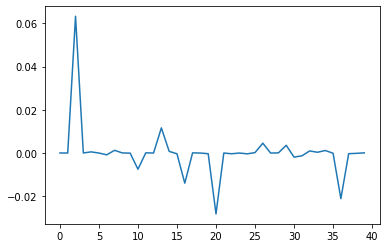

In [45]:
ll = -59.91 + 0.056*df.gmat + 5.161 * df.gpa + 2.31*df.work_experience
p1 = 1/(1+np.exp(-ll))
p2 = 1/(1 + np.exp(-(-175.05 + 0.162 *df.gmat + 14.88 * df.gpa + 7.66*df.work_experience)))
# visualize the error
plt.plot(p2-p1)
# the error mainly coming from adjusted values 0 --> 0.0001, 1 --> 0.9999

### A real example

Again, we use the example that we used in the previous session. 

**Paper**: 
Zhu, X., Baykan, C., Müller, H. J., & Shi, Z. (2021). Temporal bisection is influenced by ensemble statistics of the stimulus set. Attention, Perception & Psychophysics, 83(3), 1201–1214. https://doi.org/10.3758/s13414-020-02202-z

In this study we compare how ensemble statistics influence temporal bisection. We estimated the point of subjective equality (PSE) for each condition and use this PSE to judge if there are any significant changes in duration perception. I skip the detail design here and the estimation method (from logistic regression), and mainly focus on statistical tests. 

The results from Experiment 2 looks like this:

![](https://media.springernature.com/full/springer-static/image/art%3A10.3758%2Fs13414-020-02202-z/MediaObjects/13414_2020_2202_Fig3_HTML.png?as=webp) 


The raw data are available in my github [here](https://raw.githubusercontent.com/msenselab/sets_in_bisection/master/data/AllData_exp2.csv). 

In [49]:
# first - load data
bisection = pd.read_csv('https://raw.githubusercontent.com/msenselab/sets_in_bisection/master/data/AllData_exp2.csv')
bisection.head()
# Here the relevant columns are:
# curDur - the probe duration
# RP - Response
# cond - 1 or 2 Positive Skewed vs. Negative Skewed distribution
# NSub - subject ID

,Unnamed: 0,X,moda,durNo,cond,curDur,RP,NSub,NT,valid,NB
0,1,1,1,11,1,0.8,0,1,1,0,0
1,2,2,1,14,1,0.8,1,1,2,0,0
2,3,3,1,21,1,0.6,0,1,3,0,0
3,4,4,1,17,1,0.6,0,1,4,0,0
4,5,5,1,23,1,0.4,0,1,5,0,0


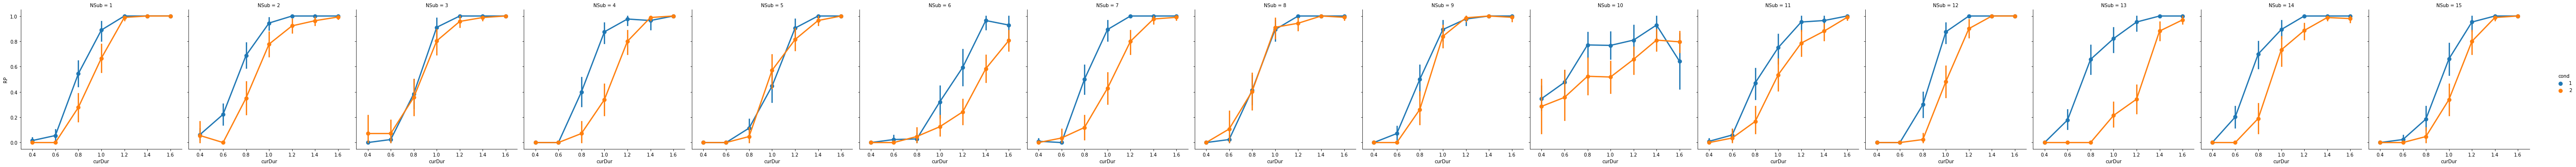

In [50]:
# quickly visualize the individual data
sns.catplot(data = bisection, kind = 'point', 
            x = 'curDur', y = 'RP', hue = 'cond', col = 'NSub')

For the illustration purpose, we only do estimation here for the group data. For full analysis, please check the source code in the Github repository. 

In [59]:
# we use pingouin package
af = bisection.query('cond == 2') #ascending frequency
df = bisection.query('cond == 1') # descening frequency

logit_af = pg.logistic_regression(af.curDur, af.RP)
logit_af.round(3)


,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-6.396,0.178,-35.918,0.0,-6.745,-6.047
1,curDur,6.440,0.162,39.847,0.0,6.123,6.757


In [60]:
logit_df = pg.logistic_regression(df.curDur, df.RP)
logit_df.round(3)

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-6.894,0.167,-41.327,0.0,-7.221,-6.567
1,curDur,8.198,0.202,40.585,0.0,7.802,8.593


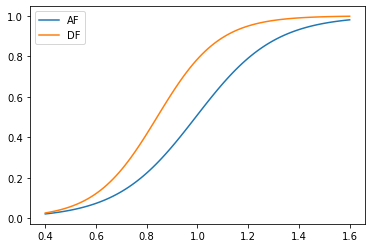

In [61]:
# visualize two conditions
Duration = np.linspace(0.4, 1.6, num = 100)
p_af = 1/(1+np.exp(-(logit_af.coef[0]+logit_af.coef[1]*Duration)))
p_df = 1/(1+np.exp(-(logit_df.coef[0]+logit_df.coef[1]*Duration)))
plt.plot(Duration, p_af)
plt.plot(Duration, p_df)
plt.legend(['AF','DF'])

We can estimate the threshold at $p=0.5$. Recall logistic function,
$$\log  \frac p {1-p} = w_0 + w_1X, $$

When $p=0.5$, the threshold X would be

$$X_{threshold} = - w_0/w_x$$

In [64]:
# so let's quickly calculate the mean PSEs. 
af_threshold = -logit_af.coef[0]/logit_af.coef[1]
df_threshold = -logit_df.coef[0]/logit_df.coef[1]
print([af_threshold, df_threshold])

[0.9932298131787788, 0.8409436659169315]


# Activation function in Artificial Neural Network (ANN)

The basic neural networks will be given in the next session. Here we only show the application of logistic regression to the network. 

Activation function of a node defines the output of that node based on the input to the node. 

![ANN](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/440px-Artificial_neural_network.svg.png)




## Linear activation
If the summation of inputs is simply pass through the note with some linear gating (i.e., linear transformation), this would be a linear activation. 

$$A(X) = w_0 + w\cdot X$$

## Step activation

If the node is only activate when the summation passes a certain threshold, this activation is a step activation. This mimick neuron firing (binary states: firing, not firing). A typical step-function activation is used in Perceptron (details in next week). 

The perceptron is a simple feedforward network. An input vector $x$ with their weights $w$ to an output 'neuron'. When the summation is greater than a threshold $\theta$, it fires (1), otherwise, it is silent (0). 

$$a(x) = 1, \text{ if wx} \gt \theta$$
$$a(x) = 0, \text { otherwise}$$

## Logistic activation
The step activation looks at the single neuron level with two states. When we characterize neuron firing from a group of neuron, we can obtain the firing rate. The firing rate increases when the inputs increase, but the firing rate cannot exceed a certain rate, which motivates the usage of sigmoid function, such as logistic function. 

## ReLU activation

There is another popular activation function is the rectified linear unit (ReLU) activation function, which enables better training of deeper networks. 

ReLU function is basically the positive part of the input:

$$A(x) = x^+ = max(0, x)$$. 


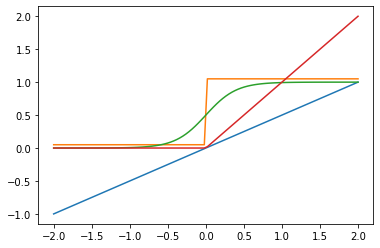

In [77]:
# illustration of different activation functions
x = np.linspace(-2,2,100)
a_linear = x.copy()/2
a_step = (np.sign(x) + 1.1)/2 # make visible in the overlapped part
a_logit = 1/(1+np.exp(-5*x))
a_relu = x.copy()
a_relu[a_relu<0]=0
plt.plot(x,a_linear)
plt.plot(x,a_step)
plt.plot(x, a_logit)
plt.plot(x, a_relu)